In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('~/Downloads/VOO.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-09-09,102.500000,102.500000,101.139999,101.320000,79.369995,26500
2010-09-10,101.680000,101.860001,101.300003,101.779999,79.730347,8600
2010-09-13,102.959999,103.139999,102.500000,103.059998,80.733002,33750
2010-09-14,102.839996,103.480003,102.379997,103.040001,80.717361,59400
2010-09-15,102.620003,103.379997,102.400002,103.300003,80.921051,9250
...,...,...,...,...,...,...
2023-06-30,405.399994,408.220001,405.290009,407.279999,407.279999,5160100
2023-07-03,406.920013,408.059998,406.679993,408.059998,408.059998,2372000
2023-07-05,406.010010,407.839996,406.010010,407.149994,407.149994,4230100


Text(0.5, 1.0, 'Daily Open Price of Vanguard 500 Index Fund (VOO) from 09/2010-07/2023')

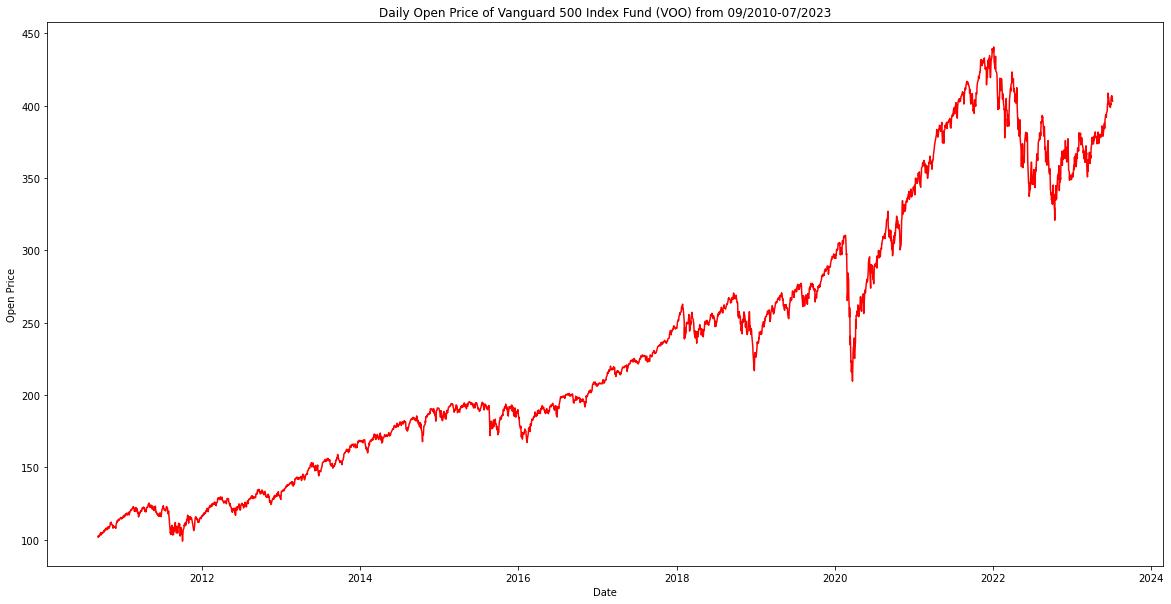

In [3]:
# Draw line plot to show daily page views from 5/2016 to 12/2019

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df['Open'], color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Open Price')
ax.set_title('Daily Open Price of Vanguard 500 Index Fund (VOO) from 09/2010-07/2023')

In [4]:
date_range = pd.date_range(start='2020-01', end='2024-01', freq='M')
new_df = pd.DataFrame(index=date_range)

In [5]:
# Insert missing monthly values with NaN

merged_df = pd.merge(df, new_df, left_index=True, right_index=True, how='outer')

In [6]:
# Filter data from 2020 to 2023 

start_date = '2020-01-01'
end_date = '2023-12-31'
filtered_df = merged_df.loc[(merged_df.index >= start_date) & (merged_df.index <= end_date)]

In [7]:
filtered_df_copy = filtered_df.copy()
filtered_df_copy['year'] = filtered_df_copy.index.to_period('Y')
filtered_df_copy['month'] = filtered_df_copy.index.strftime('%B')
filtered_df_copy

,Open,High,Low,Close,Adj Close,Volume,year,month
2020-01-02,297.290009,298.450012,296.339996,298.420013,281.972473,3142400.0,2020,January
2020-01-03,295.220001,297.359985,295.040009,296.239990,279.912659,3247900.0,2020,January
2020-01-06,294.420013,297.420013,294.350006,297.350006,280.961456,2777100.0,2020,January
2020-01-07,296.820007,297.269989,296.059998,296.529999,280.186676,2251800.0,2020,January
2020-01-08,296.709991,299.309998,296.470001,298.059998,281.632263,3719500.0,2020,January
...,...,...,...,...,...,...,...,...
2023-08-31,NaN,NaN,NaN,NaN,NaN,NaN,2023,August
2023-09-30,NaN,NaN,NaN,NaN,NaN,NaN,2023,September
2023-10-31,NaN,NaN,NaN,NaN,NaN,NaN,2023,October
2023-11-30,NaN,NaN,NaN,NaN,NaN,NaN,2023,November


In [8]:
filtered_df_bar = filtered_df_copy.groupby([filtered_df_copy['year'], filtered_df_copy['month']]).mean()
filtered_df_bar.reset_index(inplace=True)

In [9]:
# Replace missing values

filtered_df_bar.fillna(0, inplace=True)

filtered_df_bar

,year,month,Open,High,Low,Close,Adj Close,Volume
0,2020,April,252.939524,255.760002,250.218095,253.136191,240.307348,7.102695e+06
1,2020,August,310.668569,312.016190,309.644287,311.259049,297.020527,2.919067e+06
2,2020,December,338.928184,340.259089,337.476364,339.120004,325.411147,2.823373e+06
3,2020,February,301.354735,303.141579,299.166314,300.808420,284.229266,5.243711e+06
4,2020,January,300.223812,301.478097,299.140003,300.430953,283.872589,3.181467e+06
5,2020,July,293.675454,295.434089,291.674545,293.997271,280.548397,3.354391e+06
6,2020,June,285.665912,287.862276,282.657726,285.470455,271.129236,4.486318e+06
7,2020,March,242.140456,248.663182,236.194091,243.037729,230.387882,1.280753e+07
8,2020,May,268.224002,270.147499,265.852997,268.055498,254.470554,4.627900e+06
9,2020,November,325.754501,327.530501,323.554502,325.621503,312.050648,3.390875e+06


In [10]:
num_colors = 12

# Create a color palette with 12 distinct colors representing 12 months

colors = sns.color_palette("Spectral", n_colors=num_colors)

Text(0, 0.5, 'Average (Monthly) VOO Open Price from 2020 to 2023')

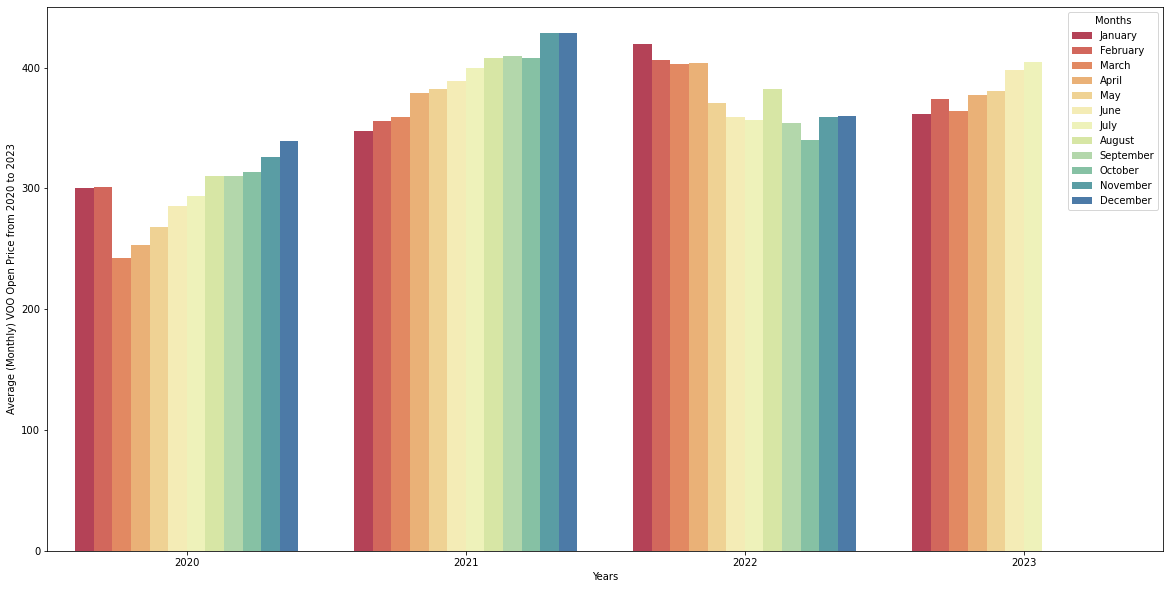

In [11]:
# Draw bar plot to show monthly page views from 2020 to 2023

filtered_df_bar['month'] = filtered_df_bar['month'].astype(str)

custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x='year', y='Open', hue='month', data=filtered_df_bar, palette=colors, hue_order=custom_order)

plt.legend(title='Months')
plt.xlabel('Years')
plt.ylabel('Average (Monthly) VOO Open Price from 2020 to 2023')

In [12]:
box_df = filtered_df.copy()
box_df['year'] = box_df.index.to_period('Y')
box_df['month'] = box_df.index.strftime('%b')

box_df.reset_index(inplace=True)
box_df

,index,Open,High,Low,Close,Adj Close,Volume,year,month
0,2020-01-02,297.290009,298.450012,296.339996,298.420013,281.972473,3142400.0,2020,Jan
1,2020-01-03,295.220001,297.359985,295.040009,296.239990,279.912659,3247900.0,2020,Jan
2,2020-01-06,294.420013,297.420013,294.350006,297.350006,280.961456,2777100.0,2020,Jan
3,2020-01-07,296.820007,297.269989,296.059998,296.529999,280.186676,2251800.0,2020,Jan
4,2020-01-08,296.709991,299.309998,296.470001,298.059998,281.632263,3719500.0,2020,Jan
...,...,...,...,...,...,...,...,...,...
897,2023-08-31,NaN,NaN,NaN,NaN,NaN,NaN,2023,Aug
898,2023-09-30,NaN,NaN,NaN,NaN,NaN,NaN,2023,Sep
899,2023-10-31,NaN,NaN,NaN,NaN,NaN,NaN,2023,Oct
900,2023-11-30,NaN,NaN,NaN,NaN,NaN,NaN,2023,Nov


Text(0, 0.5, 'VOO Open Price')

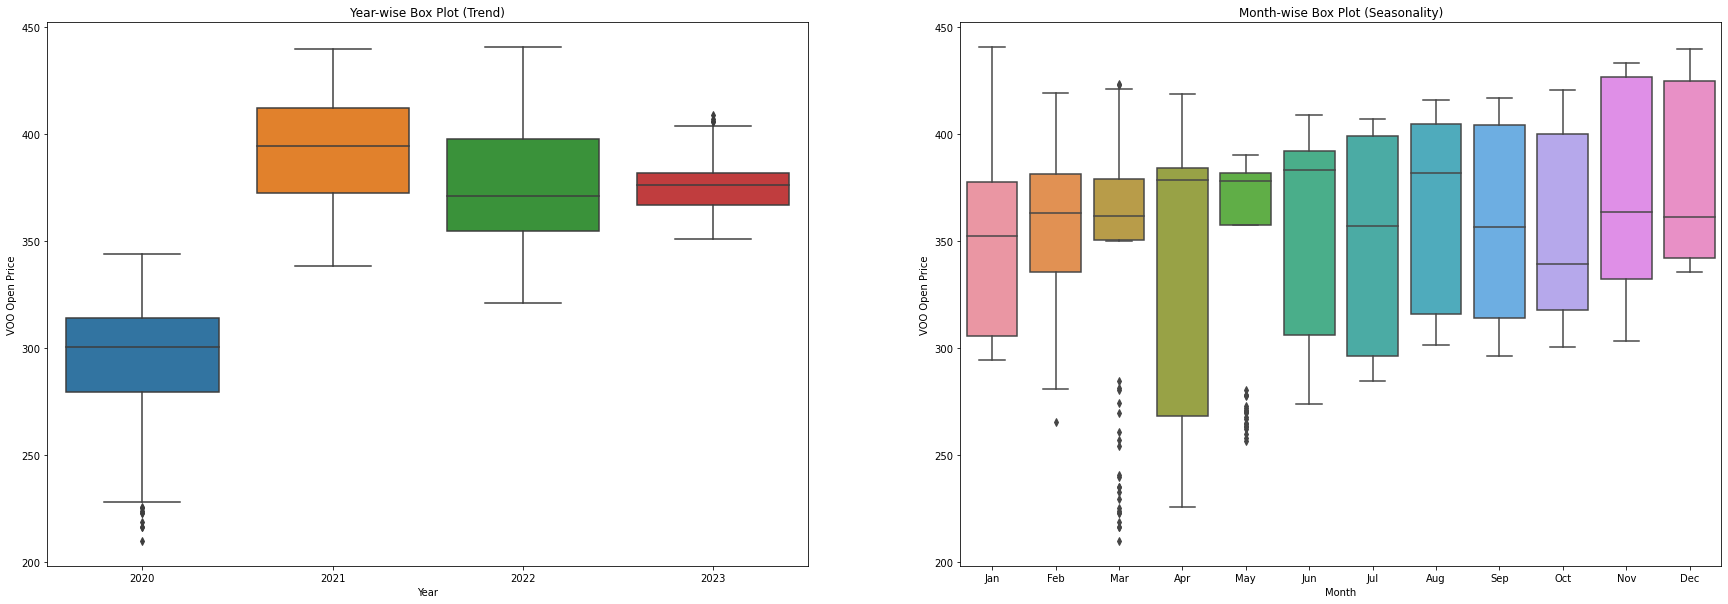

In [13]:
# Draw box plot to show trend and seasonality of Page Views

fig, axes = plt.subplots(1, 2, figsize=(30,10))

sns.boxplot(data=box_df, x="year", y="Open", ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("VOO Open Price")

custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(data=box_df, x="month", y="Open", order=custom_order, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("VOO Open Price")